# Entregável 1 - visão computacional

In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 3.2.0 


# Equalização de histograma

In [3]:
rintin = cv2.imread("RinTinTin.jpg")

In [4]:
rintin.shape

(240L, 320L, 3L)

In [5]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [6]:
rintin_gray.shape

(240L, 320L)

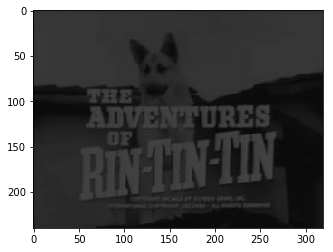

In [7]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

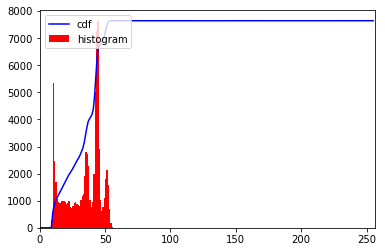

In [8]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

In [9]:
print (rintin_gray.flatten().max(),rintin_gray.flatten().min())

(58, 8)


In [10]:
o=rintin_gray.flatten()

In [11]:
rintin_gray

array([[21, 39, 42, ..., 41, 41, 37],
       [22, 40, 44, ..., 42, 42, 37],
       [23, 41, 45, ..., 42, 43, 38],
       ..., 
       [14, 28, 35, ..., 18, 18, 17],
       [16, 29, 36, ..., 18, 17, 17],
       [18, 31, 38, ..., 18, 17, 17]], dtype=uint8)

In [12]:
for i in rintin_gray:
    for o in range(len(i)):
        i[o]=((255*(i[o]-8))/50)


In [13]:
rintin_gray

array([[ 66, 158, 173, ..., 168, 168, 147],
       [ 71, 163, 183, ..., 173, 173, 147],
       [ 76, 168, 188, ..., 173, 178, 153],
       ..., 
       [ 30, 102, 137, ...,  51,  51,  45],
       [ 40, 107, 142, ...,  51,  45,  45],
       [ 51, 117, 153, ...,  51,  45,  45]], dtype=uint8)

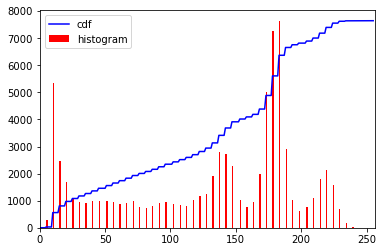

In [14]:
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

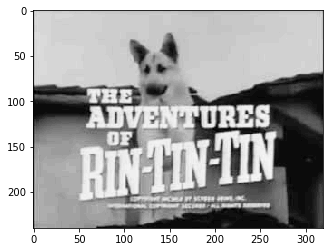

In [15]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [16]:
Caixas = cv2.imread("hall_box_battery1.jpg")

In [17]:
Caixas.shape

(3006L, 5344L, 3L)

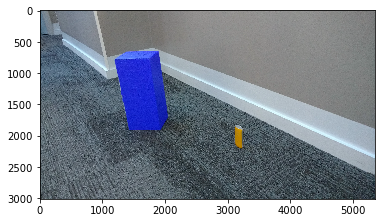

In [18]:
plt.imshow(Caixas, vmin=0, vmax=255)

In [19]:
b,g,r = cv2.split(Caixas)       
Caixas = cv2.merge([r,g,b]) 

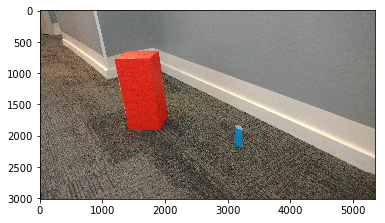

In [20]:
plt.imshow(Caixas, vmin=0, vmax=255)

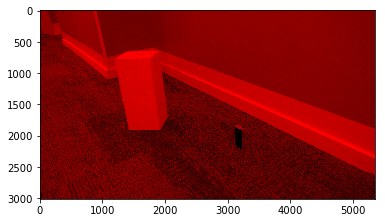

In [21]:
red=Caixas.copy()
red[:,:,1]=0
red[:,:,2]=0

plt.imshow(red, vmin=0, vmax=255)

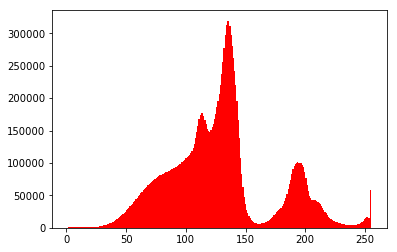

In [22]:
plt.hist(red.flatten(),256,[1,256], color = 'r')
plt.show()

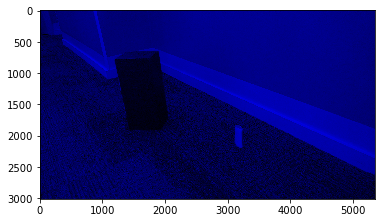

In [23]:
blue=Caixas.copy()
blue[:,:,1]=0
blue[:,:,0]=0
plt.imshow(blue, vmin=0, vmax=255)

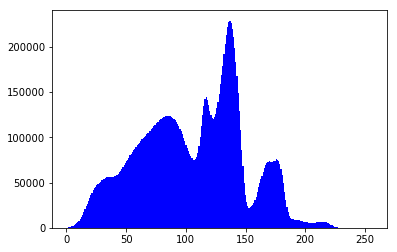

In [24]:
plt.hist(blue.flatten(),256,[1,256], color = 'b')
plt.show()

In [25]:
for a in blue:
    for c in a:
        for b in range(len(c)):
            if c[b]!=0:
                if c[b]<40:
                    c[b]=0
                else:
                    c[b]=255

In [26]:
print blue


[[[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ..., 
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ..., 
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ..., 
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 ..., 
 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ..., 
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ..., 
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ..., 
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


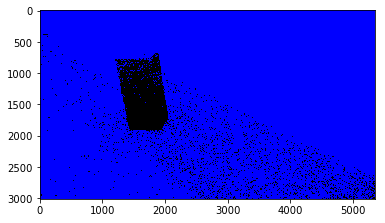

In [27]:
plt.imshow(blue,cmap="Greys_r", vmin=0, vmax=255)

In [62]:
b2 = blue.copy()
b2 = cv2.cvtColor(b2, cv2.COLOR_BGR2GRAY)

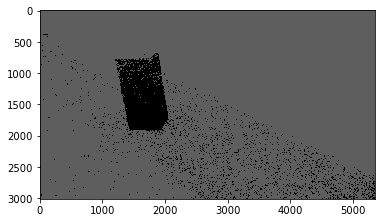

In [63]:
plt.imshow(b2,cmap="Greys_r", vmin=0, vmax=255)

In [64]:
b2i = cv2.bitwise_not(b2)


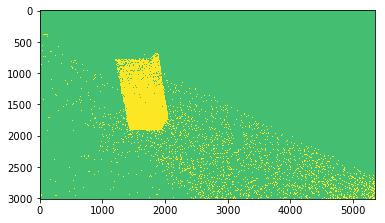

In [65]:
plt.imshow(b2i, vmin=0, vmax=255)

In [94]:
ret,thresh1 = cv2.threshold(b2,0,255,cv2.THRESH_BINARY_INV)

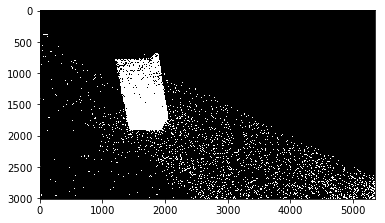

In [95]:
plt.imshow(thresh1,cmap="Greys_r", vmin=0, vmax=255)

In [28]:
for x in red:
    for y in x:
        for z in range(len(y)):
            if y[z]!=0:
                if y[z]<40:
                    y[z]=0
                else:
                    y[z]=255

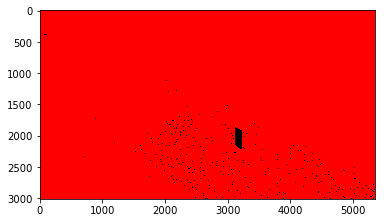

In [29]:
plt.imshow(red,cmap="Greys_r", vmin=0, vmax=255)

In [101]:
r2 = red.copy()
r2 = cv2.cvtColor(r2, cv2.COLOR_BGR2GRAY)

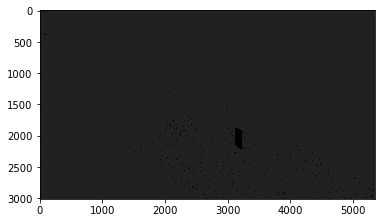

In [102]:
plt.imshow(r2,cmap="Greys_r", vmin=0, vmax=255)

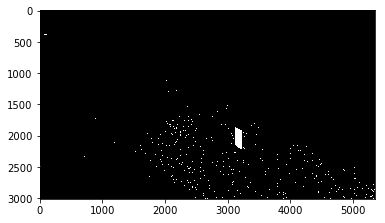

In [103]:
ret,thresh2 = cv2.threshold(r2,0,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh2,cmap="Greys_r", vmin=0, vmax=255)